# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [24]:
# Load pickled data
import pickle
# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [25]:
0### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

(array([  210.,  2220.,  2250.,  1410.,  1980.,  1860.,   420.,  1440.,
         1410.,  1470.,  2010.,  1320.,  2100.,  2160.,   780.,   630.,
          420.,  1110.,  1200.,   210.,   360.,   330.,   390.,   510.,
          270.,  1500.,   600.,   240.,   540.,   270.,   450.,   780.,
          240.,   689.,   420.,  1200.,   390.,   210.,  2070.,   300.,
          360.,   240.,   240.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

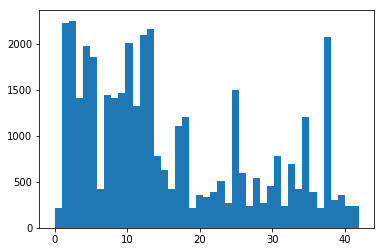

In [26]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import numpy as np
plt.hist(y_train, bins = n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [148]:
import cv2
# equalization
def preprocess(image):
    img = np.copy(image)
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(2,2))
    if len(image.shape) > 2:
        dims = 3
        for i in range(dims):
            img[:,:,i] = clahe.apply(image[:,:,i])
    else:
        img = clahe.apply(image)
    return img
import argparse
# adjust brightness
def adjust_gamma(image, gamma=1.0):
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	return cv2.LUT(image, table)

(32, 32, 3)
<class 'numpy.ndarray'>


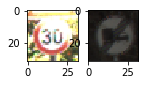

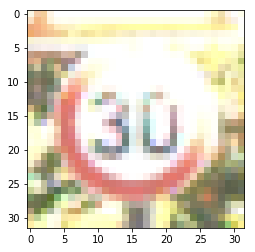

In [149]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import random
index = random.randint(0, len(X_train))
index_1 = random.randint(0, len(X_train))
image = X_train[index].squeeze()
image_1 = X_train[index_1].squeeze()
print(image.shape)
fig = plt.figure(figsize=(2,2))
a=fig.add_subplot(1,2,1)
plt.imshow(image)
a=fig.add_subplot(1,2,2)
plt.imshow(image_1)

img =adjust_gamma(image,1.5)
print(type(img))
plt.figure()
plt.imshow(img)

In [29]:
# random shift and rotate of images
def random_change(img, rse):
    # add rotate
    cols, rows, channel = img.shape
    if random.random() < rse:
        theta = random.random()*30-15
        M = cv2.getRotationMatrix2D((cols/2,rows/2),theta,1)
        img = cv2.warpAffine(img,M,(cols,rows))
    if random.random() < rse:
        col = random.choice(range(-5,5))
        row = random.choice(range(-5,5))
        M = np.float32([[1,0,col],[0,1,row]])
        img = cv2.warpAffine(img,M,(cols,rows))
    return img

In [30]:
import collections
augment_set = []
label_count = collections.Counter(y_train)
for key in label_count.keys():
    if label_count[key] < 500:
        augment_set.append(key)

origin_len = len(X_train)
new_x = []
new_y = []
# generate more with different brightness
for i in range(origin_len):
    if y_train[i] in augment_set:
        gamma = random.random()*2+0.5
        img = adjust_gamma(X_train[i], gamma)
        new_x.append(img)
        new_y.append(y_train[i])
# generate more with random shift and rotate
for i in range(origin_len):
    if y_train[i] in augment_set:
        if random.random() < 0.9:
            img = random_change(X_train[i], 0.85)
            new_x.append(img)
            new_y.append(y_train[i])

In [31]:
# extend new generated images to original training set
X_train = list(X_train)
y_train = list(y_train)
X_train.extend(new_x)
y_train.extend(new_y)
print("training size after the augment: {}".format(len(X_train)))

training size after the augment: 50562


In [32]:
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)

(50562, 32, 32, 3)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I tried several preprocessing methods, including normalization, equalization and 

In [33]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.10, random_state = 15)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The test set is just the test set of original data. I split the original training set into two parts, 90% becomes true training set, and the other 10% is validation set. Yes, I generated additional data. I chose signs with count less than 500, and change the brightness of images among those signs. The original dataset is unbalanced, range from 200-2000, which is not good for training, within each batch, we may have no training sample of those signs with count less than 500. There are two ways to overcome this, one way is to sample signs within each batch according to the ratio of each sign among the total set. Another way is to generate more images for those signs. I chose the later one and change the brightness of those images to avoid duplicate. Also I add some shift and rotate to images during the training, the shift magnitute decreased with time.

In [34]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
BATCH_SIZE = 128

In [146]:
from tensorflow.contrib.layers import flatten 
import math

def LeNet(x, drop_out):
    mu = 0
    sigma = 0.05
    
    # Layer one input size 32*32*3  output size 28*28*15
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5,5,3,15), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(15))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1,1,1,1], padding='VALID')+conv1_b
    
    covn1 = tf.nn.relu(conv1)

    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, drop_out)

#     conv1_W_1 = tf.Variable(tf.truncated_normal(shape = (5,5,3,6), mean = mu, stddev = math.sqrt(2.0/75)))
#     conv1_b_1 = tf.Variable(tf.zeros(6))
#     conv1_1 = tf.nn.conv2d(x, conv1_W_1, strides=[1,1,1,1], padding='SAME')+conv1_b_1
#     covn1_1 = tf.nn.relu(conv1_1)
#     conv1_1 = tf.nn.dropout(conv1_1, drop_out)
    
#     conv1_W_2 = tf.Variable(tf.truncated_normal(shape = (3,3,3,6), mean = mu, stddev = math.sqrt(2.0/27)))
#     conv1_b_2 = tf.Variable(tf.zeros(6))
#     conv1_2 = tf.nn.conv2d(x, conv1_W_2, strides=[1,1,1,1], padding='SAME')+conv1_b_2
#     covn1_2 = tf.nn.relu(conv1_2)
#     conv1_2 = tf.nn.dropout(conv1_1, drop_out)
    
#     conv1_W_3 = tf.Variable(tf.truncated_normal(shape = (1,1,3,3), mean = mu, stddev = math.sqrt(2.0/3)))
#     conv1_b_3 = tf.Variable(tf.zeros(3))
#     conv1_3 = tf.nn.conv2d(x, conv1_W_3, strides=[1,1,1,1], padding='SAME')+conv1_b_3
#     covn1_3 = tf.nn.relu(conv1_3)
    
#     conv1_4 = tf.nn.max_pool(x, ksize = [1,2,2,1], strides = [1,1,1,1], padding='SAME')
    
#     conv1 = tf.concat(3,[conv1_1,conv1_2,conv1_3,conv1_4])
    
#     covn1 = tf.nn.relu(conv1)
#     conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding='VALID')

    #   Layer2  28x28x15 to 26x26x20 to 13x13*20
    conv2_W = tf.Variable(tf.truncated_normal(shape = (3,3,15,20), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(20))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID')+conv2_b
    
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, drop_out)

    #   Layer3  28x28x15 to 24x24x20 to 12x12*20
    conv3_W = tf.Variable(tf.truncated_normal(shape = (5,5,15,20), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(20))
    conv3 = tf.nn.conv2d(conv1, conv3_W, strides=[1,1,1,1], padding='VALID')+conv3_b
    
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize = [1,2,2,1], strides = [1,2,2,1], padding='VALID')
    conv3 = tf.nn.dropout(conv3, drop_out)

    # concatenation
    fc0_1 = flatten(conv3)
    fc0_2 = flatten(conv2)
    fc0 = tf.concat(1,[fc0_1,fc0_2])
    
    # fully connected layer
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1220,800), mean=mu, stddev= sigma))
    fc1_b = tf.Variable(tf.zeros(800))
    fc1 = tf.add(tf.matmul(fc0, fc1_W), fc1_b)
    
    fc1 = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, drop_out)
    # second fully connected layer
    fc2_W = tf.Variable(tf.truncated_normal(shape=(800,300), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(300))
    fc2 = tf.add(tf.matmul(fc1, fc2_W), fc2_b)
    
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, drop_out)
    
    fc3_W = tf.Variable(tf.truncated_normal(shape=(300,43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b)
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The architecture I used is similar to the LeNet. It is a feedforward neural net, with 3 convolutional layers and 3 fully connnected layers, but the last two CNN layers were used like Inception Module, they both use the output of first CNN layer and their outputs were concatenated. To avoid overfitting, I also added two dropout layer between fully connected layers. At first conv layer, I utilized 15 filters with size 5x5x3, the second layer contains 20 filters with size 3x3x12, the third layer contains 20 filters with size 5x5x12. Note that there are also maxpooling layers after the conv layer. After flatten, the vector fed into fully connected layer has size 1220, then the second layer has length 800, and then 300, finnaly output 43 softmax results.

In [103]:
### Train your model here.
### Feel free to use as many code cells as needed
x = tf.placeholder(tf.float32, (None,32,32,3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [110]:

global_step = tf.Variable(0, trainable=False)
# learning rate decay
starter_learning_rate = 0.001
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           3500, 0.50, staircase=True)


logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_operation = optimizer.minimize(loss_operation, global_step=global_step)

In [150]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
# evaluation
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:(offset + BATCH_SIZE)], y_data[offset:(offset+BATCH_SIZE)]
        accuracy = sess.run(accuracy_operation, feed_dict={x:batch_x, y:batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy/num_examples

In [116]:
EPOCHS = 43
random.seed(18)

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    
    num_examples = len(X_train)
    print("Train...")
    
    print()
    rse = 0.30
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset+BATCH_SIZE
            batch_x, batch_y = X_train[offset:end],y_train[offset:end]
            newbatch = []
            for j in range(len(batch_x)):
                newbatch.append(random_change(batch_x[j,:,:,:], rse))
            newbatch = np.array(newbatch)
            sess.run(train_operation, feed_dict={x:newbatch,y:batch_y,keep_prob:0.72})
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation accuracy {:.3f}".format(validation_accuracy))
        rse = rse*0.90
    saver.save(sess, './lenet')
    print("model saved")

Train...

EPOCH 1 ...
Validation accuracy 0.554
EPOCH 2 ...
Validation accuracy 0.750
EPOCH 3 ...
Validation accuracy 0.858
EPOCH 4 ...
Validation accuracy 0.904
EPOCH 5 ...
Validation accuracy 0.924
EPOCH 6 ...
Validation accuracy 0.946
EPOCH 7 ...
Validation accuracy 0.957
EPOCH 8 ...
Validation accuracy 0.960
EPOCH 9 ...
Validation accuracy 0.968
EPOCH 10 ...
Validation accuracy 0.976
EPOCH 11 ...
Validation accuracy 0.984
EPOCH 12 ...
Validation accuracy 0.985
EPOCH 13 ...
Validation accuracy 0.982
EPOCH 14 ...
Validation accuracy 0.986
EPOCH 15 ...
Validation accuracy 0.991
EPOCH 16 ...
Validation accuracy 0.987
EPOCH 17 ...
Validation accuracy 0.974
EPOCH 18 ...
Validation accuracy 0.991
EPOCH 19 ...
Validation accuracy 0.991
EPOCH 20 ...
Validation accuracy 0.992
EPOCH 21 ...
Validation accuracy 0.993
EPOCH 22 ...
Validation accuracy 0.995
EPOCH 23 ...
Validation accuracy 0.994
EPOCH 24 ...
Validation accuracy 0.996
EPOCH 25 ...
Validation accuracy 0.994
EPOCH 26 ...
Validation 

In [117]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.963


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** 

The optimizer I used is adam optimizer, with constant learning rate 0.001, and I utilized learning rate decay, it decrease to 50 percent of original learning rate every 3500 steps(we totally have aroud 16000 steps). The batch size is 128, 40 epochs. I tried several dropout ratios for the dropout layer, the best choice is 0.7, this can decrease the influence of overfitting. At first, I also tried flip the image horizontally, but that doesn't help, this may due to the reason that traffic signs don't have the flip invariant property. But we may shift the image. Also I tried to utilized inception module and batch normalization, but it seems very hard to train those on this data set because of the low resolution and limited training samples.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
The goal of this project is similar tio MNIST, and images have the same size, thus I chose to use Lenet as basic structure. But, this time we have 43 labels, which is much larger than 10. Thus we should modify the structure a little to enlarge the capacity of the network. But it is difficult to tell how large should we add, so we have to try and use the dropout layer to avoid possible overfitting problems. Another different between this project and MNIST is that the distribution of signs is much more skewed, the learner may tended to be good at signs with large amount, but performs bad on signs with small count. So I just chose to augment the original dataset. Also the image's light condition are very different, we also need some preprocessing like equalization. For choosing hyperparameters, we can use cross validation, but that spent a lot of time. Here, I just used approaches similar to grid search.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
os.chdir("/home/zhaocheng/Desktop/CarND-Traffic-Sign-Classifier-Project")

In [138]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob, os
os.chdir("./test_images/")
files = glob.glob("*cropped.jpg")
images = [] # store the test images

/home/zhaocheng/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/zhaocheng/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


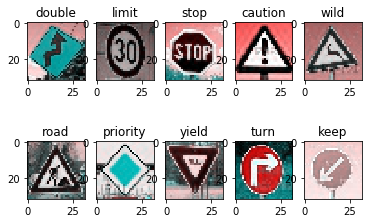

In [139]:
## draw the plot
f, axarr = plt.subplots(2, 5)
for i in range(len(files)):
    row = i/5
    col = i%5
    img = cv2.imread(files[i])
    images.append(img)
    img[:,:,0],img[:,:,2],img[:,:,1] = img[:,:,0], img[:,:,1],img[:,:,2]
    axarr[row,col].imshow(img)
    axarr[row,col].set_title(files[i].split("_")[0])
plt.show()
images = np.array(images)
os.chdir("../")

In [140]:
## There is some bugs in plt.imshow() above, but the value is right, no influence on the model testing part.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I choose ten images from the google. Then I cropped and resize them into 32x32 to fit in the network input. The details of the images is summarized as follows:

| Index | Description   | Mapping |
|-------|---------------| --------|
|   1   | double curve  |      21 |
|   2   | speed limit 30|      1  |
|   3   | stop       |      14 |
|   4   | general caution       |      18 |
|   5   | wild animal cross      |      31 |
|   6   | road work     |      25 |
|   7   | priority road       |      12 |
|   8   | yield       |      13 |
|   9   | turn right ahead       |      33 |
|   10  | keep left      |      39 |

The first difficulty is the low resolution of the image, it is hard to tell the signs if by human's eyes. Another difficulty is that I may download different signs from the trainging files, such as the shape of the sign, we don't have that large trainging set, so it may have some problems in generalizing to images found by myself. 

In [141]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_pics_classes = sess.run(logits, feed_dict={x: images, keep_prob : 1.0})
    predictions = tf.nn.softmax(new_pics_classes)
    probs = sess.run(predictions)

In [142]:
print(np.argmax(probs, 1))

[35  1 14 18 31 25 40 13 14  2]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

| Index | True Label   | Predicted Label | Match|
|-------|---------------| --------|-----------|
|   1   | double curve  | roundanout mandatoory | False|
|   2   | speed limit 30|  speed limit 30  | True|
|   3   | stop       |  stop | True|
|   4   | general caution   |  general caution | True|
|   5   | wild animal cross        |wild animal cross   | True|
|   6   | road work     |   road work | True|
|   7   | priority road   |  roundaround mandatory | False|
|   8   | yield       |     yield | True|
|   9   | turn right ahead       |  stop | False|
|   10   | keep left       |  spped limit 50 | False|

It performs not bad at the test images even with the difficulties mentioned in Question6, the accuracy is 60%, it is far from the accury got on the test set. We may find other ways to generalize our models by enlarging dataset.

In [143]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(probs, k=5, sorted=True))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [144]:
for i in range(len(predicts[0])):
    print( files[i].split('_')[0] , 'probabilities:', predicts[0][i], '\n and predicted classes:', predicts[1][i])

double probabilities: [ 0.49793634  0.26517856  0.07042539  0.06855857  0.05280263] 
 and predicted classes: [35 37 33 34 39]
limit probabilities: [  9.99998093e-01   1.56571127e-06   2.43564443e-07   9.69512683e-08
   5.43100398e-10] 
 and predicted classes: [1 2 0 5 3]
stop probabilities: [  1.00000000e+00   3.74257674e-08   1.20134400e-08   3.68265463e-09
   3.39699757e-09] 
 and predicted classes: [14  1  5  0  3]
caution probabilities: [  9.54446018e-01   4.40508425e-02   1.50315685e-03   1.03445545e-08
   6.62281601e-12] 
 and predicted classes: [18 27 24 26 28]
wild probabilities: [  9.99933004e-01   5.24354982e-05   8.79541949e-06   4.06006075e-06
   9.06874618e-07] 
 and predicted classes: [31 23 21 19 25]
road probabilities: [  1.00000000e+00   3.26251522e-31   5.04169018e-36   3.29611631e-38
   0.00000000e+00] 
 and predicted classes: [25 22 20 29  0]
priority probabilities: [  9.97801840e-01   1.15020387e-03   8.27353855e-04   9.34677155e-05
   9.28947120e-05] 
 and predict

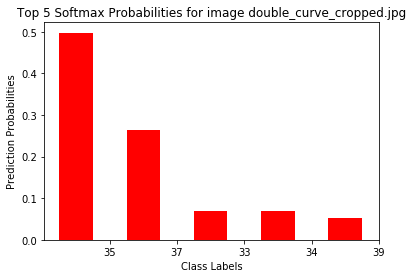

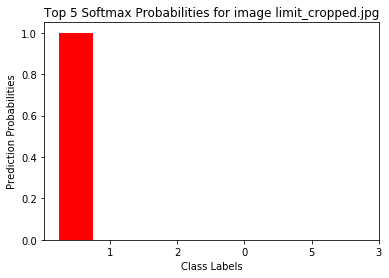

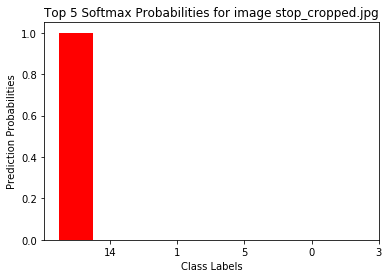

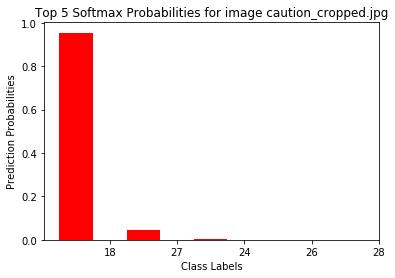

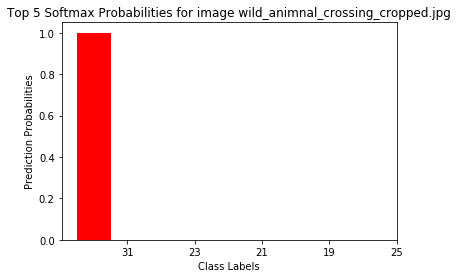

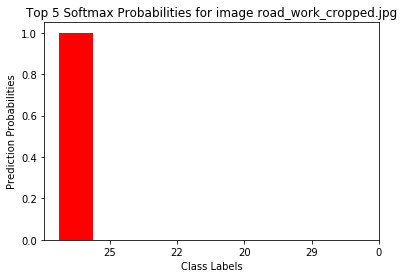

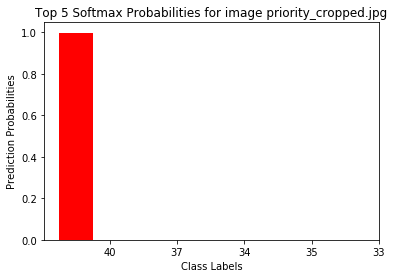

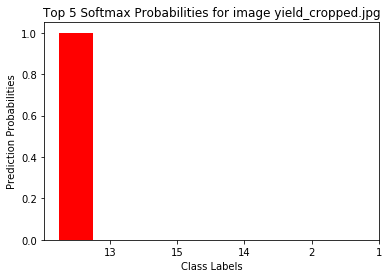

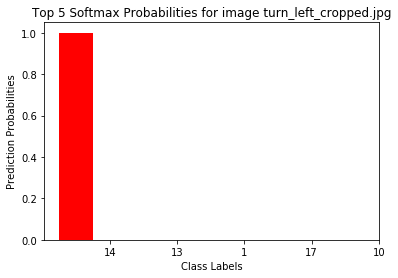

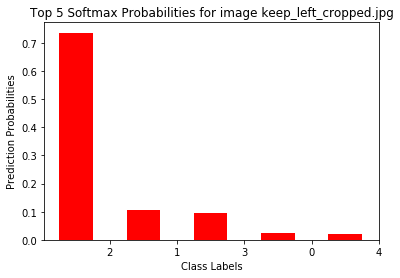

In [147]:
top_k_values = predicts[0]
top_k_indices = predicts[1]


### Visualize the softmax probabilities
N = 5

ind = np.arange(N)  # the x locations for the values
width = 0.50       # the width of the bars

for i in range(10):
    plt.figure(i)
    values = top_k_values[i]
    plt.bar(ind, values, width, color='r')
    plt.ylabel('Prediction Probabilities')
    plt.xlabel('Class Labels')
    plt.title('Top 5 Softmax Probabilities for image {}'.format(files[i]))
    plt.xticks(ind+width, tuple(top_k_indices[i]))

plt.show()

In [166]:
def random_change(img):
    # add rotate
    cols, rows, channel = img.shape
    if random.random() < 0.5:
        theta = random.random()*40-20
        M = cv2.getRotationMatrix2D((cols/2,rows/2),theta,1)
        img = cv2.warpAffine(img,M,(cols,rows))
    if random.random() < 0.5:
        col = random.choice(range(-5,5))
        row = random.choice(range(-5,5))
        M = np.float32([[1,0,col],[0,1,row]])
        img = cv2.warpAffine(img,M,(cols,rows))
    return img

**Answer:**

The model is certain about the last nine pictures with nearly probability of 1. It is no tcertain about the first picture. It seems the model for some classes of labels is kind of biased, even with top 5 predictions, for those wrong classification, it still can not get the true label. Thus we can look insight the original training dataset more and augment the dataset properly.